# 9.2 Gaussian discriminant analysis

## 9.2.6 Fischer's linear discriminant analysis *

> It is done in 2 ways:
>
> 1. Using `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
> 2. According to the book (manual calculation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Figure 9.4: Linear discriminant analysis applied to two class dataset in 2d, representing (standardized) height and weight for male and female adults.

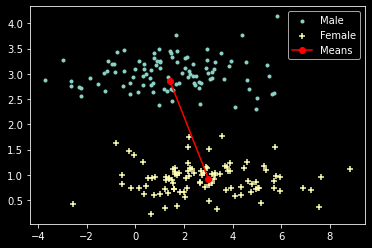

In [2]:
# Data
rng = np.random.default_rng()

nMale = 100
nFemale = 100
sample_size = nMale + nFemale

a = rng.multivariate_normal((1, 3), [[4.0, 0.01], [0.01, 0.1]], nMale)
b = rng.multivariate_normal((3, 1), [[4.0, 0.01], [0.01, 0.1]], nFemale)

mean_a = a.mean(axis=0)
mean_b = b.mean(axis=0)
mid_point = (mean_a + mean_b) / 2

_, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1], marker='.', label='Male')
ax.scatter(b[:,0], b[:,1], marker='+', label='Female')
ax.plot(mean_a, mean_b, 'o-', color='red', label='Means')
ax.legend();

In [3]:
# FLDA 1. scikit-learn's LDA w/ eigen solver
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = np.concatenate((a, b), axis=0)
Y = np.concatenate((np.zeros(nMale), np.ones(nFemale)), axis=0)

lda = LinearDiscriminantAnalysis(solver='eigen')
lda.fit(X, Y)
lda.coef_

array([[  0.39822189, -21.85299258]])

In [4]:
# FLDA 2. Manual calculation
def flda_manual(a, b):
    # Mean of the two datasets
    mean_a = a.mean(axis=0)
    mean_b = b.mean(axis=0)
    # (unbiased) covariance matrices
    # cov_a = a_.T @ a_ = np.cov(a, rowvar=False, bias=True) * a.shape[0]
    # cov_b = b_.T @ b_ = # np.cov(b, rowvar=False, bias=True) * b.shape[0]
    # cov_tot = (cov_a + cov_b) / (a.shape[0] + b.shape[0] - 2) # sample_size - feature_size
    a_ = a - mean_a
    b_ = b - mean_b
    # [Formula 9.32 in topic 9.2.6.1 in the book]
    S_W = a_.T @ a_ + b_.T @ b_
    # The vector w, which when X is projected onto it best separates the data by class. 
    # w = S_W^-1 (mean_b - mean_a) [Formula 9.42 in topic 9.2.6.1 in the book]
    w = np.linalg.inv(S_W).dot(mean_b - mean_a)
    return w

flda_manual(a, b) / lda.coef_ # proportional to lda_coef_

array([[0.005, 0.005]])

### Figure 9.4: (b) FLDA direction.

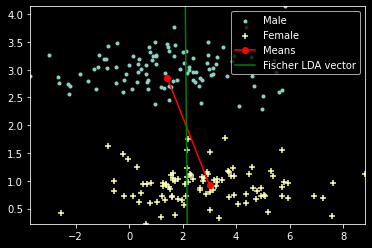

In [5]:
# plot_flda_vectors
vector = lda.coef_[0]
# vector = flda_manual(a, b)
# line y = slope * x + c through mid_point
slope = vector[1] / vector[0]
c = mid_point[1] - slope * mid_point[0]

xmin1, xmin2 = X.min(axis=0) 
xmax1, xmax2 = X.max(axis=0)

x = np.linspace(xmin1, xmax1, 100)
y = slope * x + c

_, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1], marker='.', label='Male')
ax.scatter(b[:,0], b[:,1], marker='+', label='Female')
ax.plot(mean_a, mean_b, 'o-', color='red', label='Means')
ax.plot(x, y, color='green', label='Fischer LDA vector')
ax.set(xlim=(xmin1, xmax1), ylim=(xmin2, xmax2))
ax.legend();

In [6]:
Xproj = lda.transform(X)
X.shape, Xproj.shape

((200, 2), (200, 1))

### Figure 9.4: (d) Projection onto FLDA direction shows good class separation.

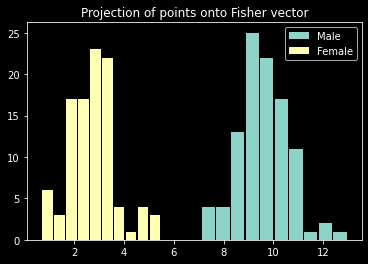

In [7]:
# Projection of points onto Fisher vector
_, ax = plt.subplots()
ax.hist(Xproj[:nMale], rwidth=0.9, label='Male')
ax.hist(Xproj[nMale:], rwidth=0.9, label='Female')
ax.set_title('Projection of points onto Fisher vector')
ax.legend();

In [8]:
# PCA 1. scikit-learn's PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X, Y)
pca.components_

array([[ 0.98195811, -0.18909859]])

In [9]:
# PCA 2. Manual calculation
def pca_manual(X, Y, n_components=1):
    # center columns by subtracting column means
    C = X - X.mean(axis=0)
    # eigendecomposition of (biased) covariance matrix
    _, vectors = np.linalg.eig(np.cov(C, rowvar=False, bias=True))
    
    return vectors.T[:n_components]

pca_manual(X, Y)

array([[ 0.98195811, -0.18909859]])

### Figure 9.4: (a) PCA direction.

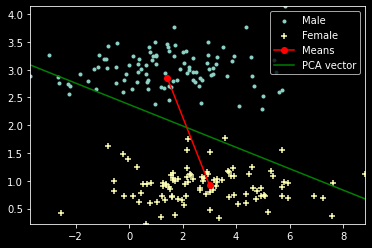

In [10]:
# plot_pca_vectors
vector = pca.components_[0] # or pca_manual(X, Y)[0]
# line y = slope * x + c through mid_point
slope = vector[1] / vector[0]
c = mid_point[1] - slope * mid_point[0]

x = np.linspace(xmin1, xmax1, 100)
y = slope * x + c

_, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1], marker='.', label='Male')
ax.scatter(b[:,0], b[:,1], marker='+', label='Female')
ax.plot(mean_a, mean_b, 'o-', color='red', label='Means')
ax.plot(x, slope * x + c, color='green', label='PCA vector')
ax.set(xlim=(xmin1, xmax1), ylim=(xmin2, xmax2))
ax.legend();

In [11]:
Xproj = pca.transform(X)
X.shape, Xproj.shape

((200, 2), (200, 1))

### Figure 9.4: (c) Projection onto PCA direction shows poor class separation.

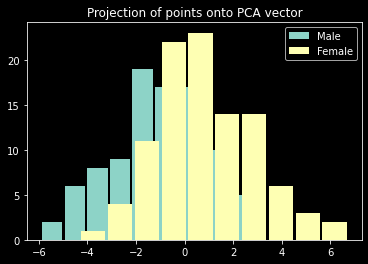

In [12]:
# Projection of points onto PCA vector
_, ax = plt.subplots()
ax.hist(Xproj[:nMale], rwidth=0.9, label='Male')
ax.hist(Xproj[nMale:], rwidth=0.9, label='Female')
ax.set_title('Projection of points onto PCA vector')
ax.legend();